# Customer CHURN Prediction Machine Learning

##### Dataset is of Famous Telecommunication service Company in US 

Introduction
Import, explore, clean, standardize, and model SyriaTel's dataset with a logistic regression to classify whether or not customers are about to churn.

We want to know the underlying influencers on churn, and how they can be adjusted in order to better predict churn. Such metrics would include p-values associated with the various features, and comparing models.

Exploratory Data Analysis
Import the Dataset
Explore the Dataset
Visualize the Dataset with a Confusion Matrix.
Hypotheses
Alternative Hypothesis: There is a multivariate relationship between the feartures in the dataset, and the churn rate.

Null Hypothesis: There is no relationship between these variables.

Methodology and Approach
This will be a supervised learning task with a plain batch. Instances are labeled with classification values corresponding to a target variable.

Performance Measure
For this logistic regression analysis, I will be using the ROC curve and AUC score to get an idea of how much error my model makes in its classifications.





### Predicing Customer lost

#### End to End Machine Learning Deployment with Flask-AWS

#### PART - 1 : Model Building and hosting local API

Data Preparation and exploration of data
Machine Learning Modelling
Model Evaluation
Export Trained Model
LOCAL REST API with Flask web-server
Create a website for predicing customer lost calling REST API

#### PART - 2 : Deploying Public API to AWS EC2 server and launch website service

Spin up an EC2 server
Configure EC2 with security group and private key
Install libraries and dependencies on the EC2 server
Move trained model and app.py flask files to EC2 (winscp)
Configure flaskapp.wsgi file and Apache vhost file
Restart apache webserver and Check API status
Launch a website with domain name and host webpage.

#### Import necessary packages 

In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

# Table details
State: the US state in which the customer resides, indicated by a two-letter abbreviation; for example, OH or NJ
Account Length: the number of days that this account has been active
Area Code: the three-digit area code of the corresponding customer’s phone number
Phone: the remaining seven-digit phone number
Int’l Plan: whether the customer has an international calling plan: yes/no
VMail Plan: whether the customer has a voice mail feature: yes/no
VMail Message: presumably the average number of voice mail messages per month
Day Mins: the total number of calling minutes used during the day
Day Calls: the total number of calls placed during the day
Day Charge: the billed cost of daytime calls
Eve Mins, Eve Calls, Eve Charge: the billed cost for calls placed during the evening
Night Mins, Night Calls, Night Charge: the billed cost for calls placed during nighttime
Intl Mins, Intl Calls, Intl Charge: the billed cost for international calls
CustServ Calls: the number of calls placed to Customer Service
Churn?: whether the customer left the service: true/false

#### Load the CHURN Data set

In [2]:
df = pd.read_csv('churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# The size of the data set was examined. It consists of 3333 observation units and 21 variables.
df.shape

(3333, 21)

In [4]:

# Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
# Descriptive statistics of the data set accessed.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [6]:

# The average of the age variable was taken according to the dependent variable.
df.groupby("state").agg("mean")

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,
AK,97.192308,438.692308,9.057692,178.384615,95.269231,30.325769,184.282692,96.576923,15.664231,192.326923,97.346154,8.654808,10.019231,4.807692,2.705385,1.557692,0.057692
AL,98.025000,430.625000,7.175000,186.010000,99.100000,31.621500,195.462500,98.462500,16.614500,187.285000,98.612500,8.427875,10.292500,4.700000,2.779000,1.562500,0.100000
AR,96.981818,439.254545,7.200000,176.116364,102.145455,29.940000,201.047273,97.836364,17.089636,205.454545,99.054545,9.245818,10.372727,4.690909,2.800727,1.981818,0.200000
AZ,100.468750,432.656250,9.468750,171.604687,100.109375,29.173125,187.748438,102.406250,15.958906,194.004687,99.984375,8.730625,10.631250,4.859375,2.870625,1.593750,0.062500
CA,99.235294,441.500000,9.000000,183.564706,104.500000,31.206176,198.970588,103.088235,16.913529,198.508824,99.205882,8.932941,9.867647,4.441176,2.665588,1.470588,0.264706
CO,102.545455,429.621212,8.363636,178.712121,95.121212,30.381818,206.884848,98.166667,17.584848,189.898485,97.060606,8.546061,9.871212,4.106061,2.665758,1.787879,0.136364
CT,99.040541,429.608108,9.067568,175.140541,98.432432,29.774324,203.828378,99.121622,17.325946,205.997297,102.283784,9.270405,10.050000,4.108108,2.713378,1.513514,0.162162
DC,105.722222,436.055556,9.740741,171.379630,100.166667,29.135370,196.272222,101.981481,16.684074,206.348148,97.666667,9.285741,10.605556,3.907407,2.864630,1.351852,0.092593
DE,101.918033,439.983607,6.967213,174.583607,98.639344,29.680164,208.247541,97.360656,17.701311,203.900000,101.213115,9.175574,10.285246,4.295082,2.778361,1.622951,0.147541


In [7]:
# Unique observation units were examined. Surname variable will be examined.
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [8]:

# Access to the correlation of the data set was provided. What kind of relationship is examined between the variables. 
# If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
# Correlation = 0 means no correlation.
# If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases. 
# When the correlations are examined, there are 1 variables that act as a positive correlation to the exited dependent variable.
# This variable is Age. As this increases, the Result variable increases.

df.corr()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


In [9]:
cat_feat = ['state', 'area code', 'international plan', 'voice mail plan']
num_feat= ['number vmail messages', 'total day minutes', 'total day calls',
          'total day charge', 'total eve calls', 'total eve charge', 
          'total night minutes', 'total night calls', 'total night charge',
          'total intl minutes', 'total intl calls', 'total intl charge', 
          'customer service calls']

In [10]:
df = df.drop(['phone number'], axis=1)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Data Visualization

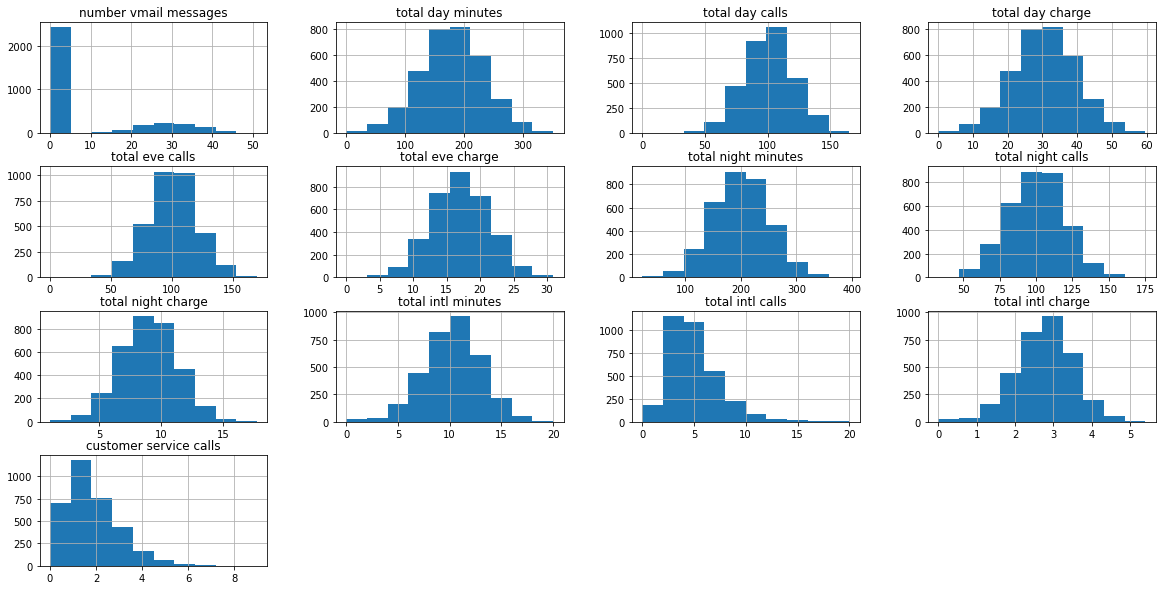

In [11]:
df[num_feat].hist(figsize=(20,10))
plt.show();

In [12]:
df['churn'].value_counts()


False    2850
True      483
Name: churn, dtype: int64

In [13]:

df['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

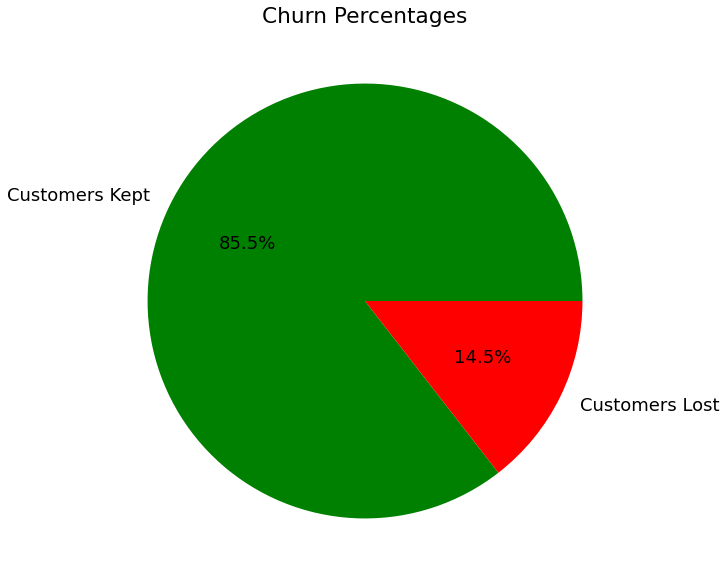

In [14]:
churn_percent = df['churn'].value_counts(normalize=True)
plt.rcParams['font.size'] = 18
plt.figure(figsize=(10,10))
plt.pie(churn_percent, labels=['Customers Kept', 'Customers Lost'], colors=['green', 'red'], autopct='%1.1f%%')
plt.title('Churn Percentages')
plt.show();

In [15]:
#Churn column contains strings for True or False.
#Turn into dummy values.
df['churn'] = pd.get_dummies(df['churn'], drop_first=True)

In [16]:
def visualize_influence(feature_list):
    for feature in feature_list:
        #Start to analyze how categorical features impact churn rate
        df_plot = df.groupby([feature])['churn'].mean().reset_index()
        x = df_plot[feature]
        y = df_plot['churn']
        plt.figure(figsize=(15,7))
        plt.bar(x, y)
        plt.xlabel(feature, fontsize=25)
        plt.ylabel('Average Churn', fontsize=25)
        plt.title(f'Average Churn rate by {feature}', fontsize=25)
        plt.xticks(fontsize=16, rotation=80)
        plt.yticks(fontsize=16)
        plt.show();

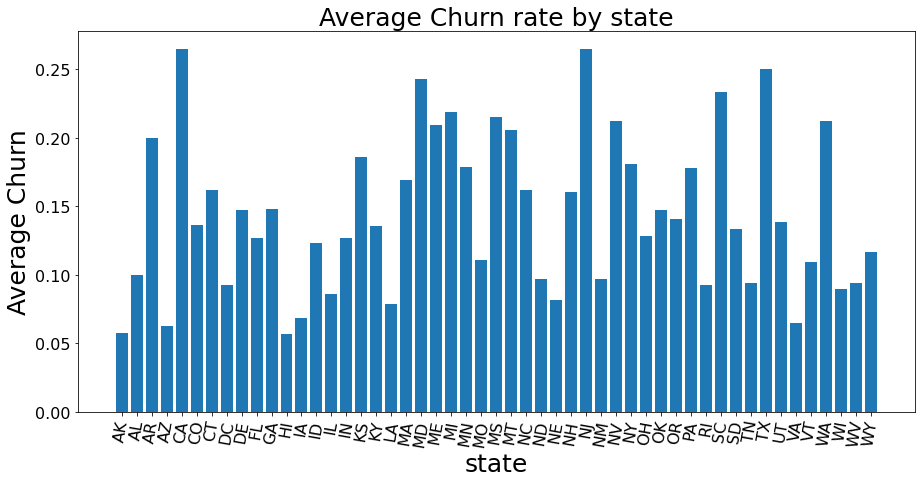

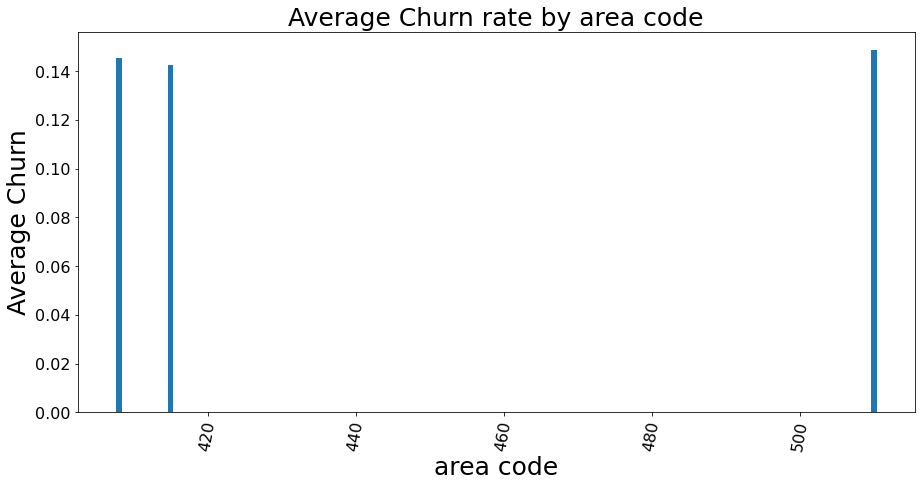

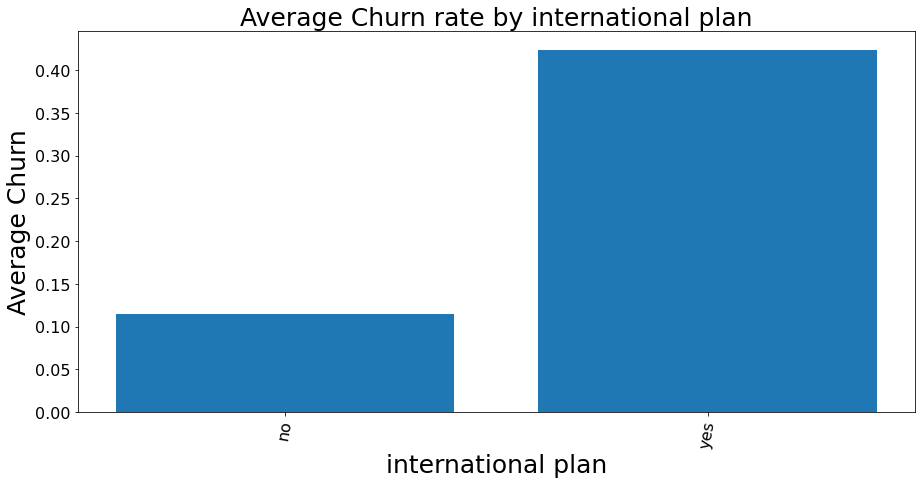

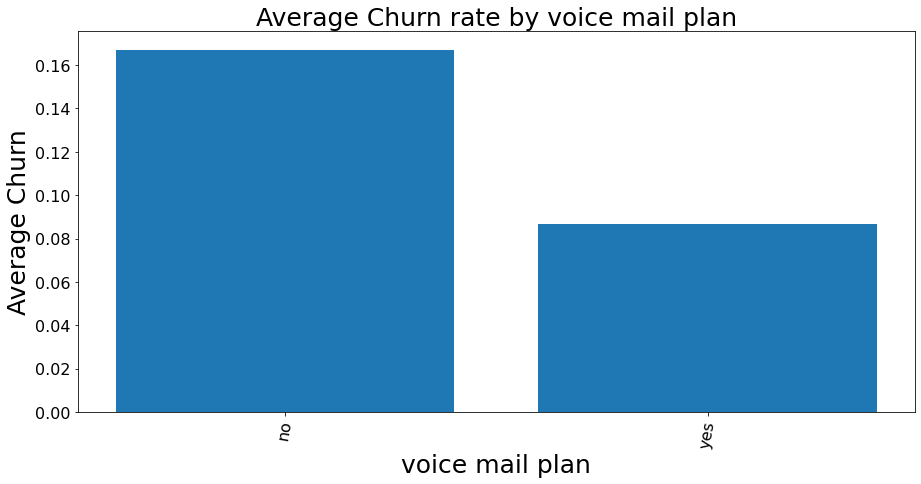

In [17]:
visualize_influence(cat_feat)

In [18]:

numeric_df = df[['number vmail messages', 'total day minutes', 'total day calls',
          'total day charge', 'total eve calls', 'total eve charge', 
          'total night minutes', 'total night calls', 'total night charge',
          'total intl minutes', 'total intl calls', 'total intl charge', 
          'customer service calls', 'churn']].copy()
numeric_df.head()

,number vmail messages,total day minutes,total day calls,total day charge,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,25,265.1,110,45.07,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,26,161.6,123,27.47,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,243.4,114,41.38,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,0,299.4,71,50.90,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,0,166.7,113,28.34,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


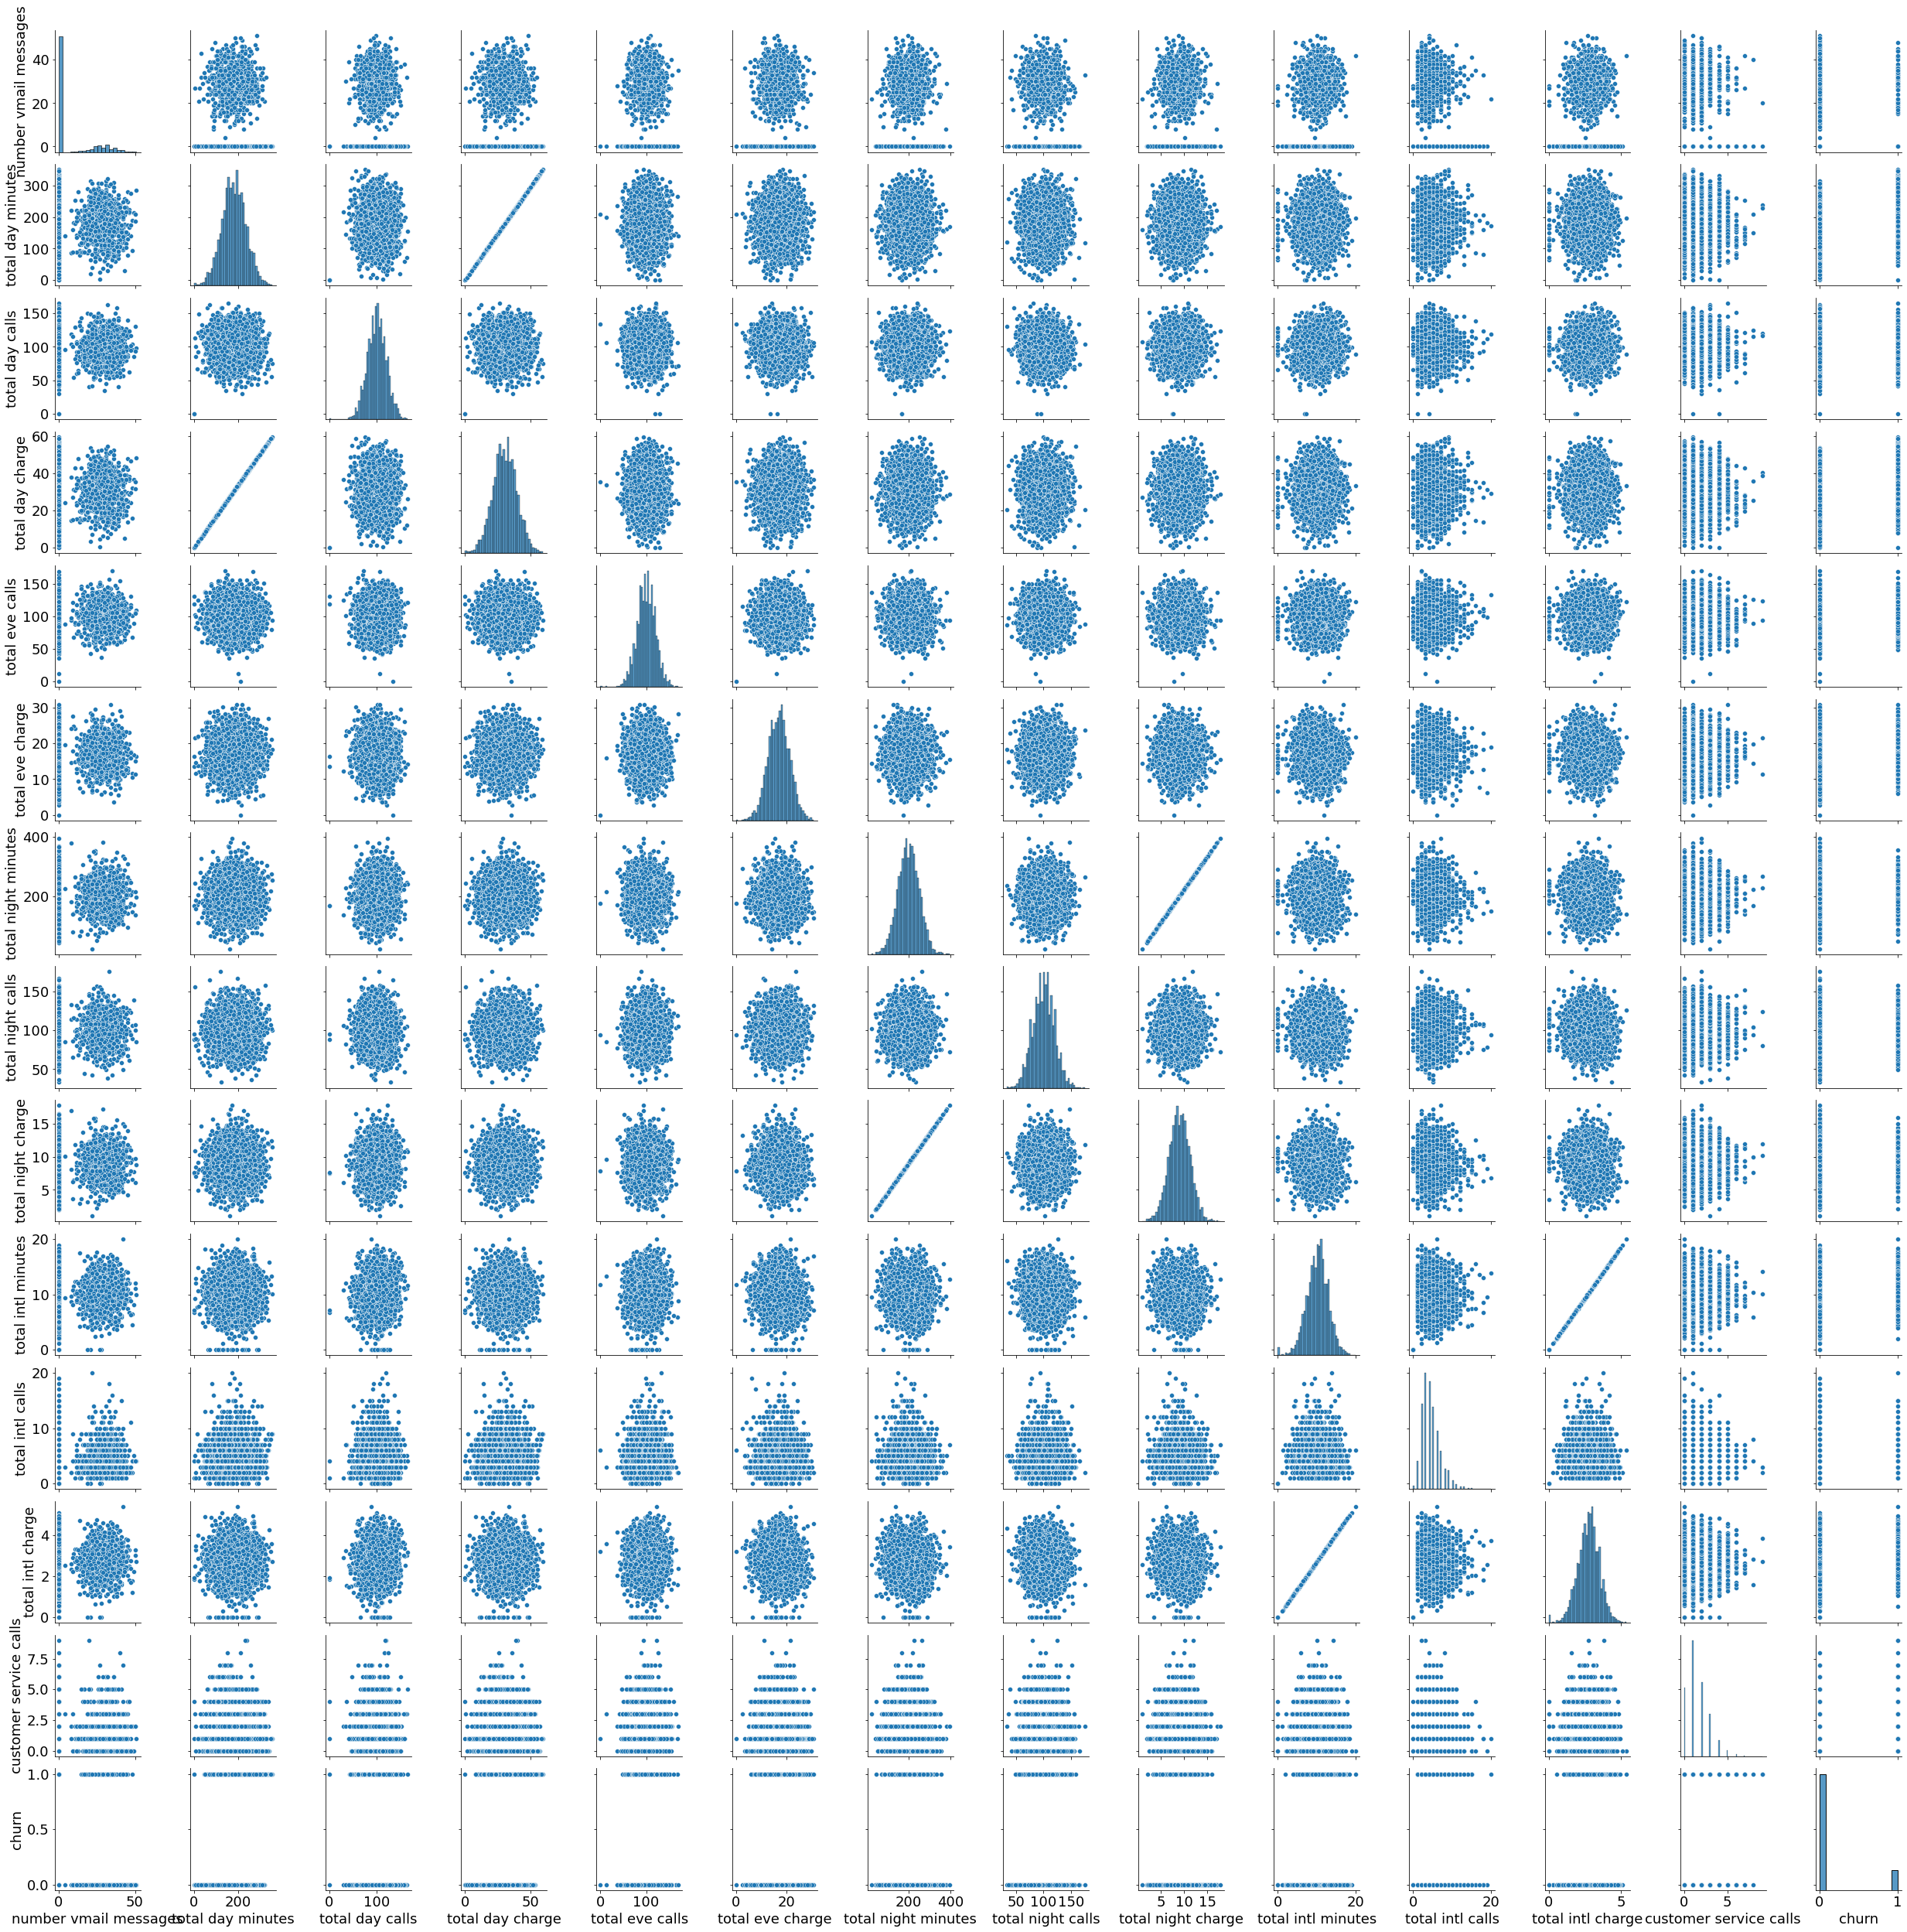

In [19]:

sns.pairplot(numeric_df, kind='scatter')

### Encoding Categorical Features

In [20]:
# Make dummy variables for the remaining categorical features.
df['international plan'] = pd.get_dummies(df['international plan'], drop_first=True)
df['voice mail plan'] = pd.get_dummies(df['voice mail plan'], drop_first=True)

In [21]:
#ohe = OneHotEncoder(handle_unknown='ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#df.head()

In [22]:
# Convert the values in 'state' into dummy variables and cols in df
# drop original col for 'state'
#df = pd.concat([df, pd.get_dummies(df['state'], prefix='dummy')], axis=1)
#df.drop(['state'], axis=1, inplace=True)
#df.head()


In [23]:

# State is a special case categorical feature that I handle with
# Label Encoding, Label Encoder transforms each state to a unique value. 
# However, these are not continuous values, so if they are statistically significant, they will need to be turned
# into dummy variables.
le = LabelEncoder()
df['state'] = le.fit_transform(df['state'])
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [24]:
import statsmodels.api as sm

y= df['churn']
x= df.drop('churn', axis=1)

#Create intercept term required for sm.Logit
#Without, the Logit model would pass through the origin.
#Establishes the threshold at 0.5
x = sm.add_constant(x)

#Fit model
logit_model = sm.Logit(y, x)

#Get results of the fit
logit_result = logit_model.fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


In [25]:
#The p values generated also show our most influential features
logit_result.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3313
Method:                           MLE   Df Model:                           19
Date:                Mon, 21 Jun 2021   Pseudo R-squ.:                     inf
Time:                        02:49:23   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -8.4723      0.929     -9.117      0.000     -10.294      -6.651
state                      0.0015      0.004      0.397      0.692      -0.006       0.009
account length             0.0008      0.001      0.594      0.553      -0.002       0.004
area code                 -0.0005      0.001     -0.370      0.712      -0.003       0.002
international plan         2.0460      0.146     14.036      0.000       1.760       2.332
voice mail plan           -2.0160      0.575     -3.507      0.000      -3.143      -0.889
number vmail messages      0.0356      0.018      1.976      0.048       0.000       0.071
total day minutes         -0.2382      3.276     -0.073      0.942      -6.658       6.182
total day calls            0.0032      0.003      1.154      0.249      -0.002       0.009
total day charge           1.4772     19.268      0.077      0.939     -36.288      39.243
total eve minutes          0.7844      1.637      0.479      0.632      -2.425       3.994
total eve calls            0.0011      0.003      0.380      0.704      -0.004       0.007
total eve charge          -9.1431     19.264     -0.475      0.635     -46.901      28.614
total night minutes       -0.1132      0.877     -0.129      0.897      -1.833       1.606
total night calls          0.0007      0.003      0.246      0.805      -0.005       0.006
total night charge         2.5974     19.495      0.133      0.894     -35.612      40.806
total intl minutes        -4.2487      5.305     -0.801      0.423     -14.645       6.148
total intl calls          -0.0931      0.025     -3.714      0.000      -0.142      -0.044
total intl charge         16.0597     19.646      0.817      0.414     -22.445      54.565
customer service calls     0.5144      0.039     13.083      0.000       0.437       0.591
==========================================================================================
"""

### Selection of Significant Features

In [26]:
sig_df = df[['international plan', 'voice mail plan', 'number vmail messages', 
          'total intl calls', 'customer service calls', 'churn']].copy()

sig_df.head()

,international plan,voice mail plan,number vmail messages,total intl calls,customer service calls,churn
0,0,1,25,3,1,0
1,0,1,26,3,1,0
2,0,0,0,5,0,0
3,1,0,0,7,2,0
4,1,0,0,3,3,0


In [27]:

Y = sig_df['churn']
X = sig_df.drop(columns=['churn'], axis=1)

X = sm.tools.add_constant(X)
Updated_Logit = sm.Logit(Y, X)
Updated_Logit_Result = Updated_Logit.fit()

Updated_Logit_Result.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3327
Method:                           MLE   Df Model:                            5
Date:                Mon, 21 Jun 2021   Pseudo R-squ.:                     inf
Time:                        02:49:24   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.3652      0.139    -16.967      0.000      -2.638      -2.092
international plan         1.9657      0.136     14.460      0.000       1.699       2.232
voice mail plan           -1.8059      0.534     -3.381      0.001      -2.853      -0.759
number vmail messages      0.0323      0.017      1.924      0.054      -0.001       0.065
total intl calls          -0.0754      0.023     -3.214      0.001      -0.121      -0.029
customer service calls     0.4418      0.037     12.090      0.000       0.370       0.513
==========================================================================================
"""

### Splitting the Data, making a Scikit-Learn Logistic Regression Baseline

In [28]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Normalize after Splitting to prevent Data Leakage

In [29]:
# Normalize the data so that it is standard in scale. Puts all values on a range between 0 and 1.
# I do not need to scale my Y_test or Y_train since it is already on the scale 0-1.
scale = MinMaxScaler()
X_train_transformed = scale.fit_transform(X_train)
X_test_transformed = scale.transform(X_test)

# Baseline Model

# Logistic Regression

In [30]:

logreg = LogisticRegression(fit_intercept = False, C = 1e15, solver='liblinear')
logreg_model = logreg.fit(X_train_transformed, Y_train)
logreg_model

LogisticRegression(C=1000000000000000.0, fit_intercept=False,
                   solver='liblinear')

In [31]:
logreg_model.coef_

array([[ 0.        ,  1.80077425, -2.06847194,  1.39088483, -8.43448515,
         1.2898846 ]])

In [32]:

Y_hat_test = logreg.predict(X_test_transformed)
Y_hat_train = logreg.predict(X_train_transformed)

In [33]:
test_predictions = logreg_model.predict(X_test_transformed)

In [34]:
from sklearn import metrics
baseline_classification_report = metrics.classification_report(Y_test, test_predictions)
print('Baseline Logistic Regression Results:\n')
print(baseline_classification_report)

Baseline Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       566
           1       0.45      0.19      0.27       101

    accuracy                           0.84       667
   macro avg       0.66      0.57      0.59       667
weighted avg       0.81      0.84      0.81       667



In [35]:

Y_hat_test = logreg.predict(X_test_transformed)
Y_hat_train = logreg.predict(X_train_transformed)

### Gauge Error in Scikit-Learn Logistic Regression, check accuracy

In [36]:
test_predictions = logreg_model.predict(X_test_transformed)

In [37]:
baseline_classification_report = metrics.classification_report(Y_test, test_predictions)
print('Baseline Logistic Regression Results:\n')
print(baseline_classification_report)

Baseline Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       566
           1       0.45      0.19      0.27       101

    accuracy                           0.84       667
   macro avg       0.66      0.57      0.59       667
weighted avg       0.81      0.84      0.81       667



### Confusion Matrix

In [38]:
# Print confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[543  23]
 [ 82  19]]


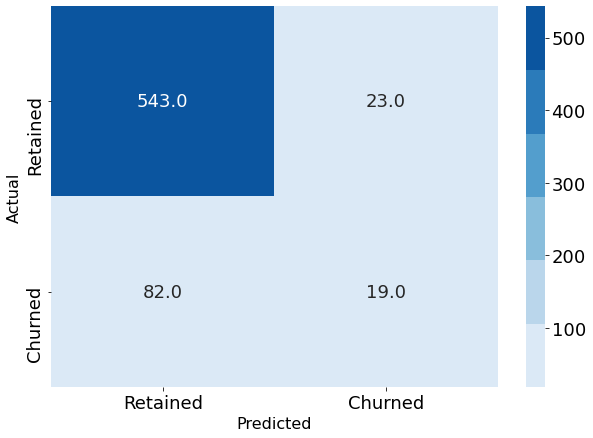

In [39]:

labels= {'Retained':0, 'Churned':1}
plt.figure(figsize=(10,7))
sns.heatmap(cnf_matrix, annot=True, cmap=sns.color_palette('Blues'), 
            xticklabels=labels, yticklabels=labels, fmt=".1f")
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.show();

# Compare Baseline Logistic Results with an XGBoost Model

In [40]:
import xgboost as xgb
from xgboost import plot_tree
from xgboost import plot_importance
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective='binary:logistic').fit(X_train, Y_train)

[02:49:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [41]:
print('XGB Accuracy on Training Set: ', xgb_model.score(X_train, Y_train))
print('XGB Accuracy on Testing Set: ', xgb_model.score(X_test, Y_test))

XGB Accuracy on Training Set:  0.8942235558889723
XGB Accuracy on Testing Set:  0.8710644677661169


In [42]:
xgb_y_pred = xgb_model.predict(X_test)

In [43]:
base_xgb_report = classification_report(Y_test, xgb_y_pred)
print('XGBoost Baseline Classification Report:\n')
print(base_xgb_report)
print('Baseline LogReg Classification Report:\n')
print(baseline_classification_report)


XGBoost Baseline Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       566
           1       0.73      0.24      0.36       101

    accuracy                           0.87       667
   macro avg       0.80      0.61      0.64       667
weighted avg       0.86      0.87      0.84       667

Baseline LogReg Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       566
           1       0.45      0.19      0.27       101

    accuracy                           0.84       667
   macro avg       0.66      0.57      0.59       667
weighted avg       0.81      0.84      0.81       667



In [44]:
#It's immediately apparent that XGBoost performs better on the data than Logistic Regression. I'll continue to run Feature Selection on my XGBoost mode

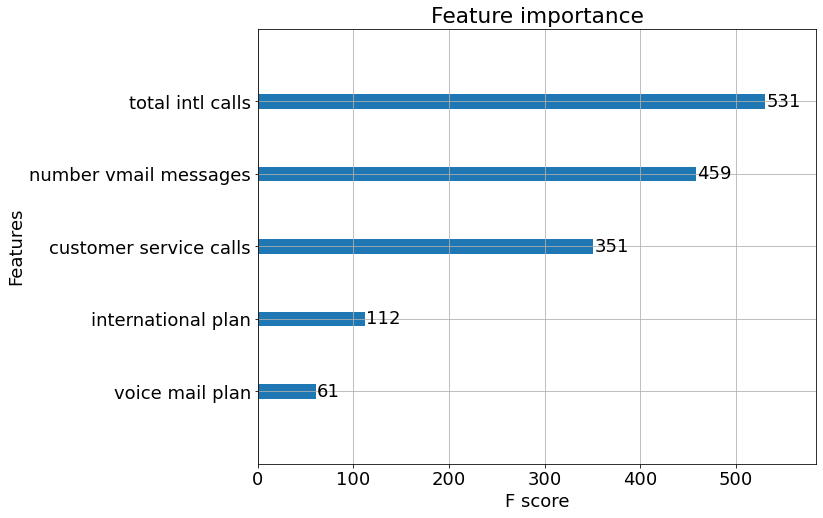

In [45]:
fig,ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)
plt.show();

In [46]:
# From Logistic Regression
sig_df.columns

Index(['international plan', 'voice mail plan', 'number vmail messages',
       'total intl calls', 'customer service calls', 'churn'],
      dtype='object')

###### Both my Logistic Regression model and my XGBoost model chose the same features as being optimal to binary classification

#### For churn rates at SyriaTel, what matters most in this study is the rate of False Negatives-- how many people are predicted to remain at SyriaTel when they are, in fact, about to churn. The cost-benefit relationship of False Negatives in this study is directly related to the number of True Negatives. By increasing model performance, possibly by evaluating multiple ensemble models, we can achieve a greater True Positive Rate at a lower False Positive Rate.

### Decision Tree

In [47]:
df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,49,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,39,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,6,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [48]:
x_test=df[['number vmail messages', 'total day minutes', 'total day calls',
          'total day charge', 'total eve calls', 'total eve charge', 
          'total night minutes', 'total night calls', 'total night charge',
          'total intl minutes', 'total intl calls', 'total intl charge', 
          'customer service calls']]

In [49]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=5)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)

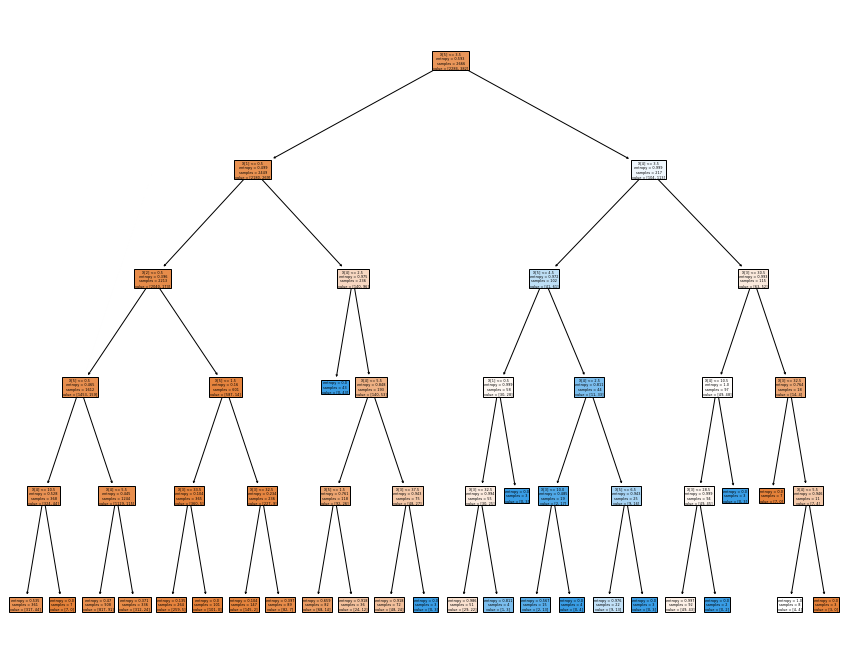

In [50]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,12))
plot_tree(clf, filled=True);

In [51]:
y_pred_proba=clf.predict_proba(X_test)[::,1]

In [52]:
metrics.accuracy_score(Y_test,y_pred)


0.8665667166416792

In [53]:
rocaucscore=metrics.roc_auc_score(Y_test,y_pred_proba)
print(rocaucscore)

0.7089178882552566


In [54]:
metrics.confusion_matrix(Y_test,y_pred)

array([[561,   5],
       [ 84,  17]], dtype=int64)

In [55]:
print(metrics.classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       566
           1       0.77      0.17      0.28       101

    accuracy                           0.87       667
   macro avg       0.82      0.58      0.60       667
weighted avg       0.86      0.87      0.83       667



In [56]:
pre,recal,_=metrics.roc_curve(Y_test,y_pred_proba)

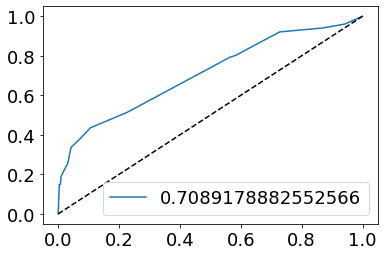

In [57]:
plt.plot(pre,recal,label=rocaucscore)
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)

# Random Forest

In [58]:
RANDOM_STATE = 42
FOLD_NUMBER = 2

In [59]:
from sklearn import tree, ensemble

CLS_WEIGHT = 'balanced'
# model = sklearn.linear_model.LogisticRegression(penalty='l1',random_state=RANDOM_STATE,class_weight=CLS_WEIGHT, solver='liblinear',max_iter=500)

model = ensemble.RandomForestClassifier(criterion='entropy', max_depth=10, random_state=RANDOM_STATE,class_weight=CLS_WEIGHT)

In [60]:
model = model.fit(X_train,Y_train)

In [61]:
model.score(X_train,Y_train)

0.8574643660915229

In [62]:
model.score(X_test,Y_test)

0.8110944527736131

In [63]:
import sklearn
preds = model.predict(X_test)
targets = Y_test

metric = sklearn.metrics.roc_auc_score(preds, targets)

metric

0.6324651016338383

In [64]:
pd.DataFrame(preds).value_counts()

0    566
1    101
dtype: int64

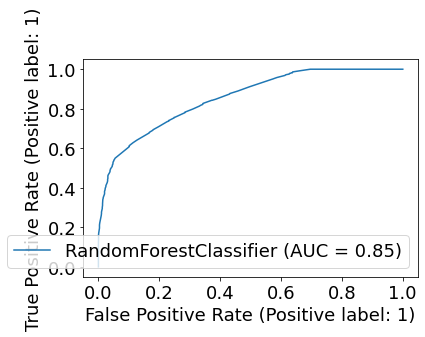

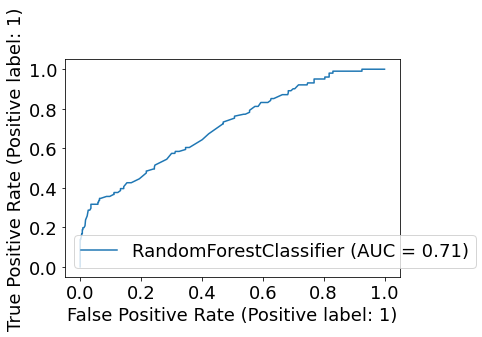

In [65]:
sklearn.metrics.plot_roc_curve(model, X_train, Y_train) 
sklearn.metrics.plot_roc_curve(model, X_test, Y_test) 
plt.legend()
plt.show() 

In [66]:
print(sklearn.metrics.classification_report(targets, preds))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       566
           1       0.38      0.38      0.38       101

    accuracy                           0.81       667
   macro avg       0.63      0.63      0.63       667
weighted avg       0.81      0.81      0.81       667



In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=45),
               RandomForestClassifier(random_state=45)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, Y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(Y_test,  yproba)
    auc = roc_auc_score(Y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

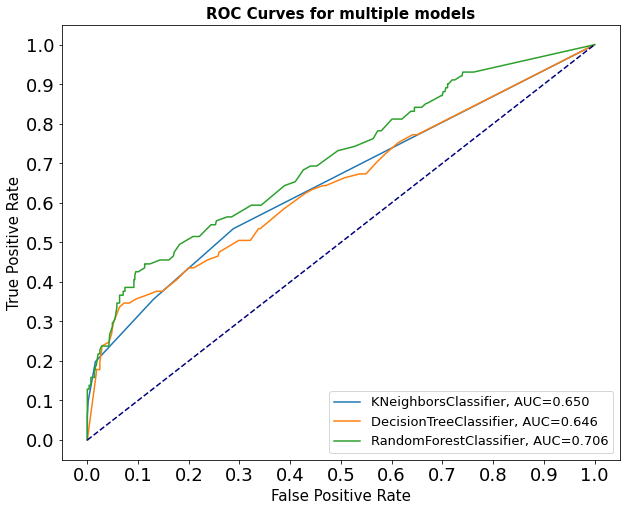

In [68]:
fig = plt.figure(figsize=(10,8))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='navy', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curves for multiple models', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

### Train-Test Separation & Balancing

In [69]:
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=12345)

In [70]:
pip install --upgrade scikit-learn --user

Requirement already up-to-date: scikit-learn in c:\users\dell\appdata\roaming\python\python38\site-packages (0.24.2)Note: you may need to restart the kernel to use updated packages.



In [77]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
pipe_steps = [
    ('svc', SVC())
]
pipeline = Pipeline(pipe_steps)
cv_split = ShuffleSplit(n_splits=5, train_size=0.7, test_size=0.25)
param_grid = {
    'svc__cache_size' : [100, 200, 400],
    'svc__C': [1, 10, 100],
    'svc__kernel' : ['rbf', 'linear'],
    'svc__degree' : [1, 2, 3, 4],
}
grid = GridSearchCV(pipeline, param_grid, cv=cv_split)
grid.fit(X_train, Y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=0.25, train_size=0.7),
             estimator=Pipeline(steps=[('svc', SVC())]),
             param_grid={'svc__C': [1, 10, 100],
                         'svc__cache_size': [100, 200, 400],
                         'svc__degree': [1, 2, 3, 4],
                         'svc__kernel': ['rbf', 'linear']})

In [78]:
print(grid.best_params_)
print(grid.best_score_)

{'svc__C': 1, 'svc__cache_size': 100, 'svc__degree': 1, 'svc__kernel': 'rbf'}
0.8581709145427286


In [ ]:

models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

# evaluate each model in turn
results = []
names = []

In [ ]:
predict_y = grid.predict(x)
print(classification_report(y, predict_y))

In [ ]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

In [ ]:
for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Değişken Önem Skorları')
        plt.ylabel('Değişkenler')
        plt.title(name)
        plt.show()

In [ ]:

# Hyperparameters have previously been obtained with the help of GridSearchCV.
models = []
models.append(('XGB', GradientBoostingClassifier(random_state = 12345,learning_rate = 0.05, max_depth = 5, min_samples_split = 2, n_estimators = 500, subsample = 0.8)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345,  learning_rate = 0.05, max_depth = 3, n_estimators = 1000)))
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False, depth = 10, iterations = 1000, l2_leaf_reg = 5, learning_rate = 0.01)))

# evaluate each model in turn
results = []
names = []

for name, model in models:
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(Y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

In [ ]:
for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Değişken Önem Skorları')
        plt.ylabel('Değişkenler')
        plt.title(name)
        plt.show()

In [ ]:
models2 = []
models2.append(("LightGBM", LGBMClassifier(random_state = 12345,  learning_rate = 0.05, max_depth = 3, n_estimators = 1000)))

# evaluate each model in turn
results = []
names = []

for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Değişken Önem Skorları')
        plt.ylabel('Değişkenler')
        plt.title(name)
        plt.show()